In [15]:
import numpy as np
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt

## Utils

In [16]:
def read_file(filename: str):
    with open(filename) as file:
        books_in_library_with_id = []
        nb_books_in_library_with_id = []
        signup_days_for_library_with_id = []
        shipping_speed_for_library_with_id = []
        
        for idx, line in enumerate(file):
            if(idx == 0):
                # Start of the file
                line_1 = line.replace('\n', '').split(' ')
#                 print(line_1)
                nb_books = int(line_1[0])
                nb_libraries = int(line_1[1])
                nb_days = int(line_1[2])

#                 print(nb_books)
#                 print(nb_libraries)
#                 print(nb_days)
            elif(idx == 1):
                book_scores_with_id = line.replace('\n', '').split(' ')
                book_scores_with_id = list(map(int,book_scores_with_id))

            else:

                if(idx % 2 == 0):
                    
                    #### Per library section
                    line_1 = line.replace('\n', '').split(' ')
                    if(line_1[0] == ''):
                        break

                    nb_books_in_library_with_id.append(int(line_1[0]))
                    signup_days_for_library_with_id.append(int(line_1[1]))
                    shipping_speed_for_library_with_id.append(int(line_1[2]))
                    
#                     print(nb_books_in_library_with_id)
#                     print(signup_days_for_library_with_id)
#                     print(shipping_speed_for_library_with_id)
                if(idx % 2 == 1):

                    book_ids = line.replace('\n', '').split(' ')
                    if(book_ids[0] == ''):
                        break

                    book_ids = list(map(int,book_ids))
                    books_in_library_with_id.append(book_ids)
#                     print("book ids : {}".format(books_in_library_with_id))



    return nb_books, \
            nb_libraries, \
            nb_days, \
            nb_books_in_library_with_id, \
            signup_days_for_library_with_id, \
            shipping_speed_for_library_with_id, \
            book_scores_with_id ,\
            books_in_library_with_id

In [17]:
def output(lib_ids, book_ids, filename):
    with open(filename, "w") as file:
        for lib_id, ids in zip(lib_ids, book_ids):
            line1 = str(lib_id) + " " + str(len(ids)) + "\n"
            file.write(line1)
            line2 = ""
            for id in ids:
                line2 += str(id) + " "
            line2 = line2[:-1] + "\n"
            file.write(line2)

## Naive algorithm

Sort libraries by signup_days_for_library_with_id and return them with a book ordering maximizing the score

In [18]:
def sort_books_per_library(library_list_in_order : list):


    # Books IDs to send first of ALL books
    book_scores_index_sorted = list(reversed(sorted(range(len(book_scores_with_id)), key=book_scores_with_id.__getitem__)))

    book_shipping_sorted_for_library_with_id = []
    for library_id in library_list_in_order:
        books = books_in_library_with_id[library_id]

        shipping_order = []
        for book_id in book_scores_index_sorted:
            if(book_id in books):
                shipping_order.append(book_id)

        book_shipping_sorted_for_library_with_id.append(shipping_order)

    return book_shipping_sorted_for_library_with_id

In [19]:
file_names = ["data/a_example.txt", "data/b_read_on.txt", 
              "data/c_incunabula.txt", "data/d_tough_choices.txt", 
              "data/e_so_many_books.txt", "data/f_libraries_of_the_world.txt"]

In [20]:
file_name = file_names[4]

In [21]:
nb_books , \
	nb_libraries, \
	nb_days, \
	nb_books_in_library_with_id, \
	signup_days_for_library_with_id, \
	shipping_speed_for_library_with_id, \
	book_scores_with_id ,\
	books_in_library_with_id  = read_file(file_name)

In [22]:
tmp = np.sort(signup_days_for_library_with_id)
indices = np.argsort(signup_days_for_library_with_id)

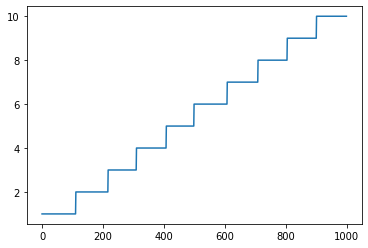

In [23]:
plt.plot(tmp)

In [24]:
cumsum = np.cumsum(tmp).tolist()

In [25]:
nb_days

200

In [26]:
lib_to_use = []
count = 0

while True:
    
    if(len(cumsum) <= count):
        break
    if(cumsum[count]>nb_days):
        break
        
    lib_to_use.append(indices[count])
    count +=1
    

In [27]:
len(lib_to_use)

155

In [ ]:
output = sort_books_per_library(lib_to_use)

In [ ]:
output(lib_to_use, output, "subm_d.txt")